In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

<ipython-input-3-e340fff12a79>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('INFY.NS.csv')
df
df = df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,0.794921,0.796679,0.791015,0.796679,0.549483,204800.0
1,1996-01-02,0.794921,0.798828,0.793457,0.793457,0.547260,204800.0
2,1996-01-03,0.798828,0.798828,0.798828,0.798828,0.550965,102400.0
3,1996-01-04,0.791015,0.794921,0.791015,0.793554,0.547327,307200.0
4,1996-01-05,0.784179,0.784179,0.784179,0.784179,0.540861,51200.0
...,...,...,...,...,...,...,...
6496,2021-10-12,1677.000000,1689.000000,1662.000000,1685.150024,1685.150024,7439300.0
6497,2021-10-13,1695.949951,1713.650024,1680.050049,1709.199951,1709.199951,7104171.0
6498,2021-10-14,1754.000000,1783.599976,1698.199951,1715.750000,1715.750000,19655776.0
6499,2021-10-18,1740.000000,1799.000000,1740.000000,1792.150024,1792.150024,13438109.0


In [ ]:
df.index = pd.to_datetime(df['Date'])
df
df = df.drop(['Date'], axis='columns')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,0.794921,0.796679,0.791015,0.796679,0.549483,204800.0
1996-01-02,0.794921,0.798828,0.793457,0.793457,0.547260,204800.0
1996-01-03,0.798828,0.798828,0.798828,0.798828,0.550965,102400.0
1996-01-04,0.791015,0.794921,0.791015,0.793554,0.547327,307200.0
1996-01-05,0.784179,0.784179,0.784179,0.784179,0.540861,51200.0
...,...,...,...,...,...,...
2021-10-12,1677.000000,1689.000000,1662.000000,1685.150024,1685.150024,7439300.0
2021-10-13,1695.949951,1713.650024,1680.050049,1709.199951,1709.199951,7104171.0
2021-10-14,1754.000000,1783.599976,1698.199951,1715.750000,1715.750000,19655776.0


In [ ]:
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
1996-01-01,-0.001758,0.005664
1996-01-02,0.001464,0.005371
1996-01-03,0.000000,0.000000
1996-01-04,-0.002539,0.003906
1996-01-05,0.000000,0.000000


In [ ]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]

In [ ]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [ ]:
df['Predicted_Signal'] = cls.predict(X)

In [ ]:

# Calculate daily returns
df['Return'] = df.Close.pct_change()

In [ ]:

# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

In [ ]:
df['Cum_Ret'] = df['Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
1996-01-01,0.794921,0.796679,0.791015,0.796679,0.549483,204800.0,-0.001758,0.005664,1,NaN,NaN,NaN
1996-01-02,0.794921,0.798828,0.793457,0.793457,0.547260,204800.0,0.001464,0.005371,1,-0.004044,-0.004044,-0.004044
1996-01-03,0.798828,0.798828,0.798828,0.798828,0.550965,102400.0,0.000000,0.000000,1,0.006769,0.006769,0.002725
1996-01-04,0.791015,0.794921,0.791015,0.793554,0.547327,307200.0,-0.002539,0.003906,1,-0.006602,-0.006602,-0.003877
1996-01-05,0.784179,0.784179,0.784179,0.784179,0.540861,51200.0,0.000000,0.000000,1,-0.011814,-0.011814,-0.015691
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-12,1677.000000,1689.000000,1662.000000,1685.150024,1685.150024,7439300.0,-8.150024,27.000000,0,-0.003430,-0.000000,9.636745
2021-10-13,1695.949951,1713.650024,1680.050049,1709.199951,1709.199951,7104171.0,-13.250000,33.599975,0,0.014272,0.000000,9.651016
2021-10-14,1754.000000,1783.599976,1698.199951,1715.750000,1715.750000,19655776.0,38.250000,85.400025,0,0.003832,0.000000,9.654849


In [ ]:
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
1996-01-01,0.794921,0.796679,0.791015,0.796679,0.549483,204800.0,-0.001758,0.005664,1,NaN,NaN,NaN,NaN
1996-01-02,0.794921,0.798828,0.793457,0.793457,0.547260,204800.0,0.001464,0.005371,1,-0.004044,-0.004044,-0.004044,-0.004044
1996-01-03,0.798828,0.798828,0.798828,0.798828,0.550965,102400.0,0.000000,0.000000,1,0.006769,0.006769,0.002725,0.002725
1996-01-04,0.791015,0.794921,0.791015,0.793554,0.547327,307200.0,-0.002539,0.003906,1,-0.006602,-0.006602,-0.003877,-0.003877
1996-01-05,0.784179,0.784179,0.784179,0.784179,0.540861,51200.0,0.000000,0.000000,1,-0.011814,-0.011814,-0.015691,-0.015691
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-12,1677.000000,1689.000000,1662.000000,1685.150024,1685.150024,7439300.0,-8.150024,27.000000,0,-0.003430,-0.000000,9.636745,11.306376
2021-10-13,1695.949951,1713.650024,1680.050049,1709.199951,1709.199951,7104171.0,-13.250000,33.599975,0,0.014272,0.000000,9.651016,11.306376
2021-10-14,1754.000000,1783.599976,1698.199951,1715.750000,1715.750000,19655776.0,38.250000,85.400025,0,0.003832,0.000000,9.654849,11.306376


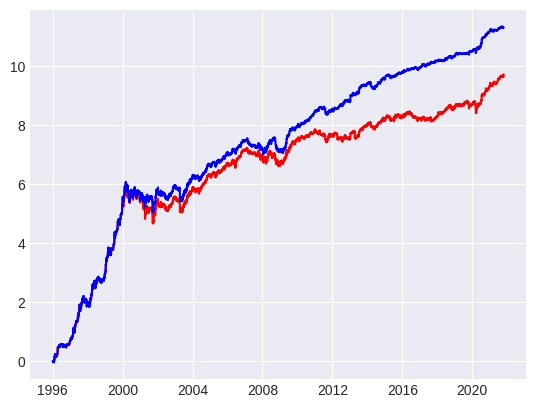

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')